In [1]:
# !pip install flask-restful

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [3]:
df = pd.read_csv('Job_titles_and_industries.csv')
df.head()

,job title,industry
0,technical support and helpdesk supervisor - co...,IT
1,senior technical support engineer,IT
2,head of it services,IT
3,js front end engineer,IT
4,network and telephony controller,IT


In [4]:
df.shape

(8586, 2)

In [5]:
df.industry.value_counts()

IT             4746
Marketing      2031
Education      1435
Accountancy     374
Name: industry, dtype: int64

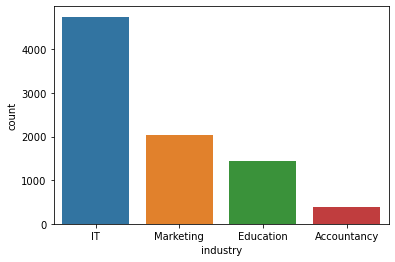

In [6]:
sns.countplot(x='industry', data=df)
plt.show()

## As we can see the data is highly imbalanced so we need to report the f1-score not the accuracy as it will be misleading due the the high imbalance between classes

In [7]:
X = df['job title']
y = df['industry']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## I will use  the Multinomial Naive Bayes as it is a powerful model for dealing with discrete data like text besides it is scalable and can handle large datasets.

In [8]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 Accountancy       0.92      0.58      0.71       112
   Education       0.98      0.82      0.89       431
          IT       0.92      0.97      0.95      1424
   Marketing       0.86      0.89      0.88       609

    accuracy                           0.91      2576
   macro avg       0.92      0.82      0.86      2576
weighted avg       0.91      0.91      0.91      2576



## we print the classification report however we are only interested in the f1-score part as it is the harmonic mean of the percision and recall and hence is a good indication for imbalanced datasets

## as we can see from the f1-score the model performance is poor for the accountancy class as it contains very few data comparing to other classes
## the performance is the best at the IT class as it contains alot of records

In [10]:
X_test.sample(5)

7664                       dance teacher- india- gt
4866    marketing automation consultant - yorkshire
7094                         sen graduate- hounslow
4532                      marketing & events intern
5427                    digital marketing executive
Name: job title, dtype: object

In [11]:
def predict_industry(s):
    return model.predict([s])[0]

In [12]:
from flask import Flask
app = Flask(__name__)

@app.route('/', methods=['GET'])
def test():
    return 'It works!'

@app.route('/<string:name>', methods=['GET'])
def returnOne(name):
    return predict_industry(name)

if __name__ == '__main__':
    app.run(debug=False, port=8080) #run app on port 8080 in debug mode

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8080/ (Press CTRL+C to quit)
127.0.0.1 - - [26/Nov/2021 18:15:58] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [26/Nov/2021 18:15:58] "GET /favicon.ico HTTP/1.1" 200 -
127.0.0.1 - - [26/Nov/2021 18:16:26] "GET /dance%20teacher-%20india-%20gt HTTP/1.1" 200 -
127.0.0.1 - - [26/Nov/2021 18:16:26] "GET /favicon.ico HTTP/1.1" 200 -
